<div style="text-align: justify"> </div>

In [1]:
import os
import pandas as pd
import scipy as sp
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [202]:

base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad = 'Valledupar'
fuente1 = 'IDEAM'
fuente2 = 'NREL'
serie_csv1 = os.path.join(base_dir,ciudad,fuente1+'.csv')
serie_pd1 = pd.read_csv(serie_csv1, sep = ';',
                encoding='latin-1')
serie_csv2 = os.path.join(base_dir,ciudad,fuente2+'.csv')
serie_pd2 = pd.read_csv(serie_csv2, sep = ';',
                encoding='latin-1')

In [4]:
def ghi_mensual(serie_horaria):
    agnos = sorted(serie_horaria['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "DIAS", "GHImes"])
    for agno in agnos:
        for mes in range(1,13):
            nombre_energia = list(serie_horaria)[-1]
            dias = sorted(serie_horaria[(serie_horaria['AÑO'] == agno) &
                        (serie_horaria['MES'] == mes)]["DIA"].unique())
            ghi_mes = serie_horaria.loc[((serie_horaria["AÑO"] == agno)
                            & (serie_horaria["MES"] == mes)),
                                        nombre_energia].sum()/1000
            ghi_dict = {"AÑO":agno, "MES":mes, "DIAS":dias[-1],
                        "GHImes":ghi_mes}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

def ghi_dia(serie_ghi_mensual):
    agnos = sorted(serie_ghi_mensual['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "GHIdiario"])
    for agno in agnos:
        for mes in range(1,13):
            dias = serie_ghi_mensual.loc[((serie_ghi_mensual["AÑO"] == agno)
                            & (serie_ghi_mensual["MES"] == mes))
                                         ,"DIAS"].item()
            ghi_diario = serie_ghi_mensual.loc[(
                (serie_ghi_mensual["AÑO"] == agno)
                            & (serie_ghi_mensual["MES"] == mes)),
                "GHImes"].item()/dias
            ghi_dict = {"AÑO":agno, "MES":mes, "GHIdiario":ghi_diario}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

In [223]:
def ghi_monthavg(serie_horaria):
    agnos = sorted(serie_horaria['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "GHImes"])
    for agno in agnos:
        for mes in range(1,13):
            nombre_energia = list(serie_horaria)[-1]
            dias = sorted(serie_horaria[(serie_horaria['AÑO'] == agno) &
                        (serie_horaria['MES'] == mes)]["DIA"].unique())
            ghi_mes = serie_horaria.loc[((serie_horaria["AÑO"] == agno)
                            & (serie_horaria["MES"] == mes)),
                                        nombre_energia].sum()/(dias[-1]*1000)
            ghi_dict = {"AÑO":agno, "MES":mes, "DIAS":dias[-1],
                        "GHImes":ghi_mes}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

In [224]:
ghi_monthavg(serie_pd1)

,AÑO,MES,DIAS,GHImes
0,2006.0,1.0,31.0,5.426402
1,2006.0,2.0,28.0,6.049858
2,2006.0,3.0,31.0,5.602049
3,2006.0,4.0,30.0,5.352159
4,2006.0,5.0,31.0,5.604888
5,2006.0,6.0,30.0,5.602158
6,2006.0,7.0,31.0,5.362423
7,2006.0,8.0,31.0,5.683691
8,2006.0,9.0,30.0,5.211831
9,2006.0,10.0,31.0,5.119954


In [219]:
ghi_dia(ghi_mensual(serie_pd1))

,AÑO,MES,GHIdiario
0,2006.0,1.0,5.426402
1,2006.0,2.0,6.049858
2,2006.0,3.0,5.602049
3,2006.0,4.0,5.352159
4,2006.0,5.0,5.604888
5,2006.0,6.0,5.602158
6,2006.0,7.0,5.362423
7,2006.0,8.0,5.683691
8,2006.0,9.0,5.211831
9,2006.0,10.0,5.119954


In [8]:
def ENFICC(data1):
    
    ghi_mensual_loc = ghi_mensual(data1)
    ghi_diario_loc = ghi_dia(ghi_mensual_loc)
    percentil = 0.01
    enficc = ghi_diario_loc.quantile(q=percentil, 
                                 numeric_only=True)["GHIdiario"]

    return print('La ENFICC 99% es: ', enficc)

In [82]:
def graphED(arrayIDEAM,arrayNRELMOD,arrayNREL):
    
    NRELMODadj=datadj(arrayNRELMOD,arrayIDEAM)
    NRELadj=datadj(arrayNREL,arrayIDEAM)

    ghi_mensual_loc1 = ghi_mensual(arrayIDEAM)
    ghi_diario_loc1 = ghi_dia(ghi_mensual_loc)    
    datos_IDEAM1 = sorted(ghi_diario_loc["GHIdiario"])
    numdatos1 = range(len(datos_IDEAM1))

    ghi_mensual_loc2 = ghi_mensual(NRELMODadj)
    ghi_diario_loc2 = ghi_dia(ghi_mensual_loc2)    
    datos_IDEAM2 = sorted(ghi_diario_loc2["GHIdiario"])
    numdatos2 = range(len(datos_IDEAM2))

    ghi_mensual_loc3 = ghi_mensual(NRELadj)
    ghi_diario_loc3 = ghi_dia(ghi_mensual_loc3)    
    datos_IDEAM3 = sorted(ghi_diario_loc3["GHIdiario"])
    numdatos3 = range(len(datos_IDEAM3))

    pylab.xlabel("Datos")
    pylab.ylabel("Energía/Energía Base IDEAM")
    pylab.plot(numdatos1,datos_IDEAM1/datos_IDEAM1[0],'-k', label='IDEAM')
    pylab.plot(numdatos2,datos_IDEAM2/datos_IDEAM1[0],'-b', label='NRELMOD')
    pylab.plot(numdatos3,datos_IDEAM3/datos_IDEAM1[0],'-r', label='NREL')

    pylab.legend(loc='upper left')
    pylab.savefig(os.path.join(output_dir,'valledupar_IDEAM.png'), dpi=600)
    
    return pylab.plot()

[]

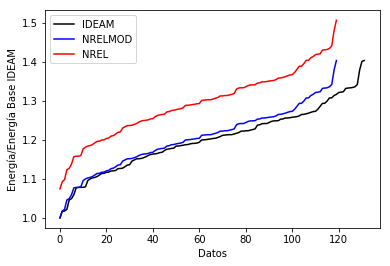

In [220]:
graphED(serie_pd1,y4,serie_pd2)

In [11]:
def datapiece(data, year1, year2, month1, month2, day1, day2):
    piece=data[(data['AÑO']>=year1) & (data['AÑO']<=year2)
            & (data['MES']>=month1) & (data['MES']<=month2)
            & (data['DIA']>=day1) & (data['DIA']<=day2)]
    return piece

In [180]:
def datadj(data1,data2):
    data1_adj=data1[(data1['AÑO']>=data2.iloc[0,0]) & (data1['AÑO']<=data2.iloc[-1,0])
            & (data1['MES']>=data2.iloc[0,1]) & (data1['MES']<=data2.iloc[-1,1])
            & (data1['DIA']>=data2.iloc[0,2]) & (data1['DIA']<=data2.iloc[-1,2])]
    
    return data1_adj


In [199]:
def MCP(data_ref,data_obj):
    
    #Extrae los datos de referenia en el intervalo de tiempo de los datos objetivo 
    data_ref_adj=datadj(data_ref,data_obj)
    #Calcula los estadísticos de los datos en el periodo común
    mu_obj=data_obj['IDEAM'].mean()
    sigma_obj=data_obj['IDEAM'].std()
    mu_ref=data_ref_adj['NREL'].mean()
    sigma_ref=data_ref_adj['NREL'].std()
    
    #Calcula los parámetros del modelo
    m=sigma_obj/sigma_ref
    b=mu_obj-m*mu_ref
    
    #Aplica el modelo remplazando los valores negativos con 0
    data_ref_cor=data_ref['NREL']*m+b
    data_ref_cor[data_ref_cor < 0] = 0
    
    dat2 = pd.DataFrame({'NRELMOD': data_ref_cor})
    newdata=data_ref.join(dat2['NRELMOD'])
    
               
    return newdata

In [16]:
def RMSEn(data1,column1,data2,column2):
    
    #Ajusta la primera lista de datos para que concuerde con el periodo de la segunda lista
    data1_adj=datadj(data1,data2)
    
    #Aplica la función de error cuadratico medio normalizado paso a paso
    fst=(data1_adj[column1]-data2[column2])**2
    N=len(data2.index)
    scnd=sqrt(fst.sum()/N)
    x_d2_max=data2[column2].max()
    x_d2_min=data2[column2].min()
    rmsen=scnd/(x_d2_max-x_d2_min)
    
    return rmsen

In [17]:
def MBE(data1,column1,data2,column2):
    
    #Ajusta la primera lista de datos para que concuerde con el periodo de la segunda lista
    data1_adj=datadj(data1,data2)
    
    #Aplica la función de error de sesgo medio paso a paso
    fst=(data1_adj[column1]-data2[column2])
    scnd=data2[column2].sum()
    mbe=fst.sum()/scnd
    
    return mbe

In [210]:
def KSI(data1,column1,data2,column2):
    
    data1_adj=datadj(data1,data2)
    
    ksi=sp.stats.ks_2samp(data1_adj[column1],data2[column2])
    return ksi[1]

In [174]:
x= datapiece(serie_pd1, 2008, 2009, 1, 1, 1, 1)

In [204]:

y1=x
y2=serie_pd1
y3=serie_pd2
y4= MCP(serie_pd2,x)
y4



,AÑO,MES,DIA,HORA,NREL,NRELMOD
0,2005,1,1,0,0.0,0.000000
1,2005,1,1,1,0.0,0.000000
2,2005,1,1,2,0.0,0.000000
3,2005,1,1,3,0.0,0.000000
4,2005,1,1,4,0.0,0.000000
5,2005,1,1,5,0.0,0.000000
6,2005,1,1,6,14.0,12.040206
7,2005,1,1,7,179.5,166.515509
8,2005,1,1,8,407.0,378.860714
9,2005,1,1,9,612.5,570.671438


In [47]:
def valmaxday(serie_horaria,columna):
    agnos = sorted(serie_horaria['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "DIA", "MAX"])
    for agno in agnos:
        for mes in range(1,13):            
            dias = sorted(serie_horaria[(serie_horaria['AÑO'] == agno) &
                        (serie_horaria['MES'] == mes)]["DIA"].unique())
            for dia in dias:
                val_max= serie_horaria[(serie_horaria['AÑO'] == agno) &
                        (serie_horaria['MES'] == mes) &  (serie_horaria['DIA'] == dia)][columna].max()
                ghi_dict = {"AÑO":agno, "MES":mes, "DIA":dia,
                        "MAX":val_max}
                ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
                
    return ghi_df

In [49]:
def valmaxmth(serie_horaria,columna):
    agnos = sorted(serie_horaria['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "MAX"])
    for agno in agnos:
        for mes in range(1,13):  
            
            val_max= serie_horaria[(serie_horaria['AÑO'] == agno) &
                        (serie_horaria['MES'] == mes)][columna].max()
            ghi_dict = {"AÑO":agno, "MES":mes,
                        "MAX":val_max}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
                
    return ghi_df